# Abstract
The technique of listening to and evaluating audio recordings is known as audio classification. This method, also known as sound classification, is the basis of several modern AI applications, including virtual assistants, automatic speech recognition, and text to speech. Predictive maintenance, smart home security systems, multimedia indexing and retrieval, music genre identification, and text to speech are all examples of applications of sound classification. Audio classifications can be of multiple types and forms such as — Acoustic Data Classification or acoustic event detection, Music classification, Natural Language Classification, and Environmental Sound Classification.
In our capstone project, we have implemented an audio classifier using signal processing and a few machine learning algorithms.

This project is focused on the classification of audio signals using machine learning techniques. The goal is to develop models that can accurately classify different types of audio signals, such as music, speech, and environmental sounds, based on their acoustic features. The project uses the UrbanSound8K dataset, which consists of 8,732 audio files labeled with 10 different sound classes.

In This Project I would be Training 3 Different Models
- Deep Neural Network
- Random Forest Classifier
- Support Vector Machine (SVM)

The audio files in the dataset are pre-processed by the script - https://github.com/KaranAgrawal1509/Mel-Frequency-Cepstral-Coefficient-Classifications/blob/main/MFCCExtraction.ipynb to extract Mel frequency cepstral coefficients (MFCCs), which are commonly used features in audio signal processing and analysis. The MFCCs are extracted using the Librosa library in Python, and are used as input to a machine learning models for classification.

# Dataset
For this project we will be using the “UrbanSound8k” dataset, which is publicly available for academic use.
This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes:
- air_conditioner, 
- car_horn, 
- children_playing, 
- dog_bark, 
- drilling, 
- enginge_idling, 
- gun_shot,
- jackhammer, 
- siren,
- street_music. 

The audio files are in .wav format. The samples are around 4 seconds in length.

# Reason for Choosing above models for the classification
### Deep Neural Network:
- DNNs can be used for classification tasks because they are capable of learning complex, non-linear relationships between input features and output classes.
- DNNs can automatically extract features from raw data, which is particularly useful when dealing with high-dimensional data such as images and text.
- DNNs can generalize well to unseen data, which makes them a good choice for many real-world classification problems.
### Support Vector Machine:
- SVMs can be used for classification tasks because they are capable of finding the optimal hyperplane that separates the data into different classes, based on the maximum margin between the classes.
- SVMs are effective in handling both linearly and non-linearly separable data, which makes them a versatile choice for many classification problems.
- SVMs are known for their ability to handle high-dimensional data, making them particularly useful in tasks such as image classification and text classification.
### Random Forest:
- Random Forest can be used for classification tasks because it is an ensemble learning algorithm that combines multiple decision trees to make a final prediction.
- Random Forest is particularly effective in handling noisy and high-dimensional data, which makes it a good choice for many real-world classification problems.
- Random Forest can provide insights into feature importance, which is useful for understanding the underlying patterns in the data and selecting the most relevant features for the classification task.

The project also includes a visual analysis of the audio signals, including plots of the audio waveforms and spectrograms of the MFCCs. These plots provide insights into the structure and characteristics of the audio signals, and can be used to identify patterns and features that are relevant for classification.

Overall, the project demonstrates the use of machine learning techniques and audio signal processing for the classification of audio signals. The results show that the SVM classifier can achieve high accuracy in classifying different types of audio signals based on their acoustic features, and provide a basis for further research and development in this area.


## What are MFCC's ?
MFCC stands for Mel Frequency Cepstral Coefficients, which is a widely used technique in audio signal processing and analysis. It is a method for representing the spectral envelope of an audio signal by extracting a set of features that capture the most important characteristics of the signal.

In simple terms, MFCCs are a set of numerical values that represent the different frequency bands of an audio signal. They are based on the Mel scale, which is a perceptual scale that approximates the way humans perceive the frequency of sound. The Mel scale divides the audible frequency range into a number of bands that are spaced closer together at lower frequencies and further apart at higher frequencies.

The process of extracting MFCCs involves dividing the audio signal into short frames, typically 20-40 milliseconds in length, and computing the power spectrum of each frame using the Fourier transform. The resulting spectrum is then transformed using a bank of Mel-scale filters to create a set of Mel-frequency coefficients. These coefficients are then transformed using the Discrete Cosine Transform (DCT) to produce a set of cepstral coefficients, which are the final MFCCs.

MFCCs have proven to be a very effective way to represent audio signals for a wide range of applications, such as speech recognition, music genre classification, speaker identification, and sound event detection.
I have Extracted MFCC's from raw Audio Files in another Notebook

Link to the Notebook - https://github.com/KaranAgrawal1509/Mel-Frequency-Cepstral-Coefficient-Classifications/blob/main/MFCCExtraction.ipynb 

In [1]:
#Importing all necessary libraries for this execution
import tensorflow as tf
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from keras import backend as K
#Training a Deep Neural Network, and Saving the best model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

import seaborn as sns
from sklearn.metrics import *

In [2]:
#######################################################################################################################
### Helper Functions
#######################################################################################################################
def plot_performance(data):
    '''
    Plots the model's accuracy and loss on training and testing datasets.

    Parameters:
    data (history): A history object that contains the accuracy and loss metrics for the model.

    Returns:
    None
    '''
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

def get_key(val):
    '''
    Returns the key corresponding to a given value in a dictionary.

    Parameters:
    val (str): A value for which the corresponding key is required.

    Returns:
    key (str): The key corresponding to the given value in the dictionary.
    '''
    for key, value in labelencoder_name_mapping.items():
        if val == value:
            return key


def mapping(predictions):
    '''
    Returns the keys corresponding to the predicted labels.

    Parameters:
    predictions (ndarray): An array of predicted labels.

    Returns:
    new_list (ndarray): An array of keys corresponding to the predicted labels.
    '''
    new_list = []
    for i in predictions:
        new_list.append(get_key(i))
    return np.array(new_list)

def run_models(model):
    '''
    Fits a machine learning model on the training data, predicts labels on the testing data, and evaluates the model's performance.

    Parameters:
    model: A machine learning model to be trained and evaluated.

    Returns:
    y_pred (ndarray): An array of predicted labels.
    '''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Precision of the model is: %.3f' % precision_score(y_test, y_pred, average = 'micro'))
    print('Recall of the model is: %.3f' % recall_score(y_test, y_pred, average = 'macro'))
    print('F1 Score of the model: %.3f' % f1_score(y_test, y_pred, average = 'micro'))
    print('Accuracy of the model on testing data is: %.3f' % accuracy_score(y_test, y_pred))
    return np.array(mapping(y_pred))

def create_dnn_model(activation='relu', dropout_rate=0.4, optimizer='adam'):
    '''
    Defines and compiles a deep neural network (DNN) model for multi-class classification.

    Parameters:
    activation (str): The activation function to be used in the hidden layers. Default is 'relu'.
    dropout_rate (float): The dropout rate to be used in the hidden layers. Default is 0.4.
    optimizer (str): The optimizer to be used for compiling the model. Default is 'adam'.

    Returns:
    dnn_model (Sequential): A DNN model for multi-class classification with the specified architecture and compiled with the specified optimizer.
    '''
    dnn_model = Sequential()
    dnn_model.add(Dense(800, input_shape=(80, x.shape[1])))
    dnn_model.add(Activation(activation))
    dnn_model.add(Dropout(dropout_rate))
    dnn_model.add(Dense(400))
    dnn_model.add(Activation(activation))
    dnn_model.add(Dropout(dropout_rate))
    dnn_model.add(Dense(200))
    dnn_model.add(Activation(activation))
    dnn_model.add(Dropout(dropout_rate))
    dnn_model.add(Dense(100))
    dnn_model.add(Activation(activation))
    dnn_model.add(Dropout(dropout_rate))
    dnn_model.add(Dense(50))
    dnn_model.add(Activation(activation))
    dnn_model.add(Dropout(dropout_rate))
    dnn_model.add(Dense(num_labels))
    dnn_model.add(Activation('softmax'))
    dnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return dnn_model

def calculate_metrics(cm):
    """
    Calculate macro-average Precision, Recall, F1-score, and Accuracy for a given confusion matrix.
    
    Args:
        cm (numpy array): A confusion matrix of shape (n_classes, n_classes).
    
    Returns:
        macro_precision (float): The macro-average Precision across all classes.
        macro_recall (float): The macro-average Recall across all classes.
        macro_f1_score (float): The macro-average F1-score across all classes.
        accuracy (float): The overall Accuracy of the model.
    """
    # Calculate True Positives by getting the diagonal values of the confusion matrix
    true_positives = np.diag(cm)
    
    # Calculate False Positives by summing each column and subtracting True Positives
    false_positives = np.sum(cm, axis=0) - true_positives
    
    # Calculate False Negatives by summing each row and subtracting True Positives
    false_negatives = np.sum(cm, axis=1) - true_positives
    
    # Calculate the total number of predictions by summing all the elements in the confusion matrix
    total_predictions = np.sum(cm)

    # Calculate Precision for each class
    precision = true_positives / (true_positives + false_positives)
    
    # Calculate Recall for each class
    recall = true_positives / (true_positives + false_negatives)
    
    # Calculate F1-score for each class
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    # Calculate the overall Accuracy of the model
    accuracy = np.sum(true_positives) / total_predictions

    # Calculate the macro-average Precision, Recall, and F1-score
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1_score = np.mean(f1_score)

    return macro_precision, macro_recall, macro_f1_score, accuracy


In [3]:
# Import the pandas library for data analysis and manipulation
import pandas as pd

# Read the MFCCs.csv file from a URL and store it in a DataFrame called 'extracted_features_df'
extracted_features_df = pd.read_csv("https://github.com/KaranAgrawal1509/Urban-Sound-Classification/raw/main/Metadata/MFCCs.csv")

# Print the 'extracted_features_df' DataFrame to display the extracted features for the audio files
print(extracted_features_df)

                 class          0           1           2          3  \
0             dog_bark -211.93698   62.581203 -122.813150 -60.745293   
1     children_playing -417.00520   99.336624  -42.995586  51.073326   
2     children_playing -452.39316  112.362530  -37.578068  43.195866   
3     children_playing -406.47922   91.196600  -25.043558  42.784520   
4     children_playing -439.63873  103.862240  -42.658787  50.690277   
...                ...        ...         ...         ...        ...   
8727          car_horn -391.37210  125.362390  -40.634056  25.899754   
8728          car_horn -339.42715   76.409096  -35.309883  41.984035   
8729          car_horn -297.31534  102.090260  -36.751080  26.816488   
8730          car_horn -336.92386  115.313900  -44.847100  24.968985   
8731          car_horn -307.41760   83.306730  -25.756512  35.448110   

              4          5          6          7          8  ...        70  \
0    -13.893760 -29.789835  -3.978875  11.682742  12.9638

In [4]:
# Concatenate columns 0-3 separated by commas into a new column 'Features'
extracted_features_df['feature'] = extracted_features_df.loc[:, '0':'79'].apply(lambda x: ','.join(x.astype(str)), axis=1)

# Convert comma-separated values into lists of numerical values
extracted_features_df['feature'] = extracted_features_df['feature'].apply(lambda x: [float(i) for i in x.split(',')])

# Create a list of column names to be dropped
cols_to_drop = [str(i) for i in range(80)]

# Drop the columns specified in 'cols_to_drop'
extracted_features_df.drop(cols_to_drop, axis=1, inplace=True)

# Print the modified 'extracted_features_df' DataFrame
print(extracted_features_df)

                 class                                            feature
0             dog_bark  [-211.93698, 62.581203, -122.81315, -60.745293...
1     children_playing  [-417.0052, 99.336624, -42.995586, 51.073326, ...
2     children_playing  [-452.39316, 112.36253, -37.578068, 43.195866,...
3     children_playing  [-406.47922, 91.1966, -25.043558, 42.78452, 11...
4     children_playing  [-439.63873, 103.86224, -42.658787, 50.690277,...
...                ...                                                ...
8727          car_horn  [-391.3721, 125.36239, -40.634056, 25.899754, ...
8728          car_horn  [-339.42715, 76.409096, -35.309883, 41.984035,...
8729          car_horn  [-297.31534, 102.09026, -36.75108, 26.816488, ...
8730          car_horn  [-336.92386, 115.3139, -44.8471, 24.968985, -9...
8731          car_horn  [-307.4176, 83.30673, -25.756512, 35.44811, 4....

[8732 rows x 2 columns]


In [5]:
# Split the dataset into independent and dependent dataset
# Extract the 'feature' column as a list and convert it to a NumPy array
x = np.array(extracted_features_df['feature'].tolist())

# Extract the 'class' column as a list and convert it to a NumPy array
y = np.array(extracted_features_df['class'].tolist())

In [6]:
#Shape of Independent Features
x.shape

(8732, 80)

In [7]:
#Shape of Dependent Features
y.shape

(8732,)

In [8]:
# One-Hot Encoding Dependent features to suit the use of Neural Networks
# Instantiate a LabelEncoder object
labelencoder = LabelEncoder()

# Fit the LabelEncoder to the 'class' column of the 'extracted_features_df' DataFrame
labelencoder.fit(extracted_features_df['class'])

# Create a dictionary to map the encoded labels to their original names
labelencoder_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))

# Encode the 'class' column using the LabelEncoder and convert it into a one-hot encoded matrix using to_categorical
y = to_categorical(labelencoder.fit_transform(y))

In [9]:
#Created a mapping dictionary of Label and category
labelencoder_name_mapping

{'air_conditioner': 0,
 'car_horn': 1,
 'children_playing': 2,
 'dog_bark': 3,
 'drilling': 4,
 'engine_idling': 5,
 'gun_shot': 6,
 'jackhammer': 7,
 'siren': 8,
 'street_music': 9}

In [10]:
#Data Spliting for Training and Validation Purpose
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
### No of classes
num_labels=y.shape[1]

# Training Deep Neural Network

In [12]:
#####################################################################################################################
### Hyperparameter Tuning of Deep Neural Network
#####################################################################################################################

# Create the KerasClassifier wrapper
model = KerasClassifier(build_fn=create_dnn_model, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.2, 0.4, 0.6],
    'optimizer': ['adam', 'sgd']
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_result = grid.fit(x_train, y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-12-79da8f58e18c>:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_dnn_model, verbose=0)
/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: 0.499644 using {'activation': 'tanh', 'dropout_rate': 0.2, 'optimizer': 'adam'}


In [13]:
# Create the DNN model with the best hyperparameters we got from Hyperparameter Tuning
# Extract the best hyperparameters from the grid search results
best_activation = grid_result.best_params_['activation']
best_dropout_rate = grid_result.best_params_['dropout_rate']
best_optimizer = grid_result.best_params_['optimizer']

# Create a DNN model with the best hyperparameters
dnn_model = create_dnn_model(activation=best_activation, dropout_rate=best_dropout_rate, optimizer=best_optimizer)

# Fit the model to the training data and evaluate it on the testing data
# Train the model for 100 epochs with a batch size of 128
dnn_history = dnn_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128)

Epoch 1/100
55/55 [==============================] - 3s 13ms/step - loss: 1.9203 - accuracy: 0.3167 - val_loss: 1.4224 - val_accuracy: 0.5209
Epoch 2/100
55/55 [==============================] - 0s 6ms/step - loss: 1.3908 - accuracy: 0.5319 - val_loss: 1.0808 - val_accuracy: 0.6560
Epoch 3/100
55/55 [==============================] - 0s 6ms/step - loss: 1.1346 - accuracy: 0.6345 - val_loss: 0.8973 - val_accuracy: 0.7001
Epoch 4/100
55/55 [==============================] - 0s 6ms/step - loss: 0.9553 - accuracy: 0.6962 - val_loss: 0.7810 - val_accuracy: 0.7539
Epoch 5/100
55/55 [==============================] - 0s 6ms/step - loss: 0.8216 - accuracy: 0.7423 - val_loss: 0.6974 - val_accuracy: 0.7848
Epoch 6/100
55/55 [==============================] - 0s 6ms/step - loss: 0.7326 - accuracy: 0.7721 - val_loss: 0.5998 - val_accuracy: 0.8214
Epoch 7/100
55/55 [==============================] - 0s 6ms/step - loss: 0.6677 - accuracy: 0.7891 - val_loss: 0.6358 - val_accuracy: 0.8111
Epoch 8/100


In [14]:
# Evaluate the model on the test data
# Calculate the test loss and accuracy using the evaluate function of the DNN model
test_loss, test_accuracy = dnn_model.evaluate(x_test, y_test)

# Print the evaluation metrics
# Print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

55/55 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 0.9061
Test loss: 0.3904464840888977
Test accuracy: 0.9061247706413269


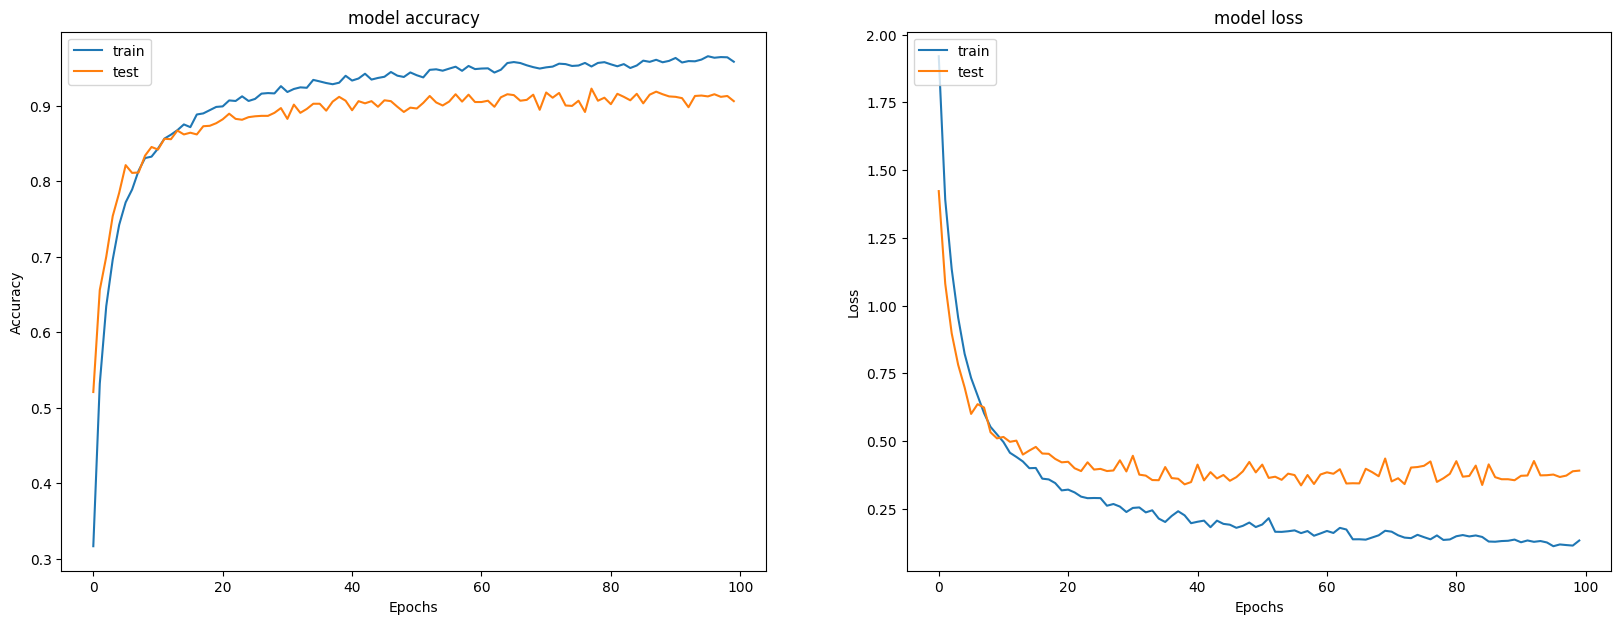

In [15]:
#Performance (Accuracy and Loss) of DNN during the training  
plot_performance(dnn_history)

In [16]:
# Get the predicted labels for the test data
dnn_predictions  = dnn_model.predict(x_test)

55/55 [==============================] - 0s 2ms/step


In [17]:
# Convert the predicted probabilities into class predictions
# Find the index with the highest predicted probability for each test sample using argmax function
dnn_predictions = np.argmax(dnn_predictions, axis=1)

# Convert the one-hot encoded matrix of y_test back to a vector of class labels
y_test = np.argmax(y_test, axis=1)

In [18]:
#Mapping the output with actual label
dnn_predictions = mapping(dnn_predictions)

In [19]:
# Convert the numerical class labels back to their original string names using the 'mapping' function
y_test = mapping(y_test)

In [20]:
# Get the unique class names predicted by the DNN model
class_names = np.unique(dnn_predictions)

# Print the unique class names
print(class_names)

['air_conditioner' 'car_horn' 'children_playing' 'dog_bark' 'drilling'
 'engine_idling' 'gun_shot' 'jackhammer' 'siren' 'street_music']


In [21]:
# Create a confusion matrix to evaluate the performance of the DNN model
# Use the confusion_matrix function of the scikit-learn library to compute the confusion matrix
dnn_matrix = confusion_matrix(y_test, dnn_predictions, labels=class_names)
macro_precision, macro_recall, macro_f1_score, accuracy = calculate_metrics(dnn_matrix)

print("Precision of the model is: ", macro_precision)
print("Recall of the model is: ", macro_recall)
print("F1 Score of the model: ", macro_f1_score)
print("Accuracy of the model on testing data is: ", accuracy)

Precision of the model is:  0.9149771555111039
Recall of the model is:  0.8928443985530977
F1 Score of the model:  0.9015406641108166
Accuracy of the model on testing data is:  0.9061247853463079


In [22]:
# Convert the confusion matrix into a DataFrame using pandas
# Set the row and column labels using the class names
dnn_cmtx = pd.DataFrame(
    dnn_matrix, 
    index=['true:{:}'.format(x) for x in class_names], 
    columns=['pred:{:}'.format(x) for x in class_names]
)

<Axes: >

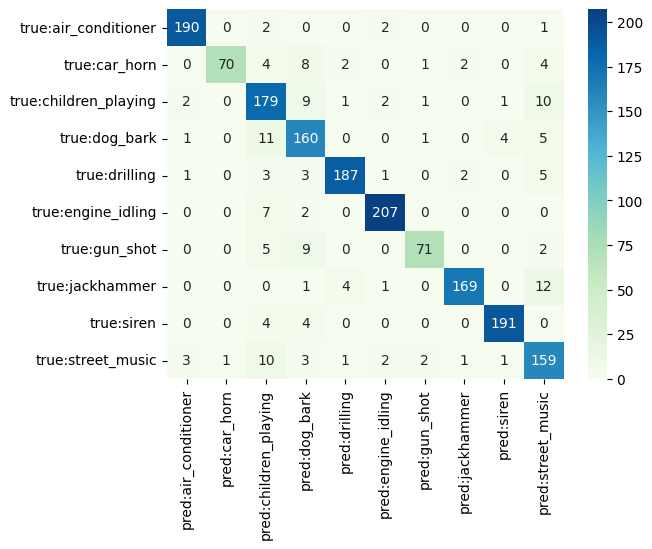

In [23]:
#Confusion Matrix for the Deep Learning Model on Features - MFCC's
sns.heatmap(dnn_cmtx, annot= True, cmap = 'GnBu', fmt='g')

In [24]:
# Load the features and class labels into X and y variables, respectively
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

# Encode the class labels using label encoding
labelencoder = LabelEncoder()

# Fit the label encoder to the class labels and transform the class labels to encoded labels
y = labelencoder.fit_transform(y)

In [25]:
#Splitting Data into Training and Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Training SVM and Random Forest Classifier

In [26]:
#Initializing Random Forest Classifier and SVM
plt.rcParams["figure.figsize"] = (11.7,8.27)
forest_clf = RandomForestClassifier(max_depth=10, random_state=0)
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [27]:
#####################################################################################################################
### Hyperparameter Tuning of RandomForest
#####################################################################################################################
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=0), rf_param_grid, n_iter=5, cv=3, n_jobs=-1)
rf_random_search.fit(x_train, y_train)
print("Best parameters for SVC: ", rf_random_search.best_params_)

Best parameters for SVC:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30}


In [28]:
# Train RandomForest with the best parameters found by RandomizedSearchCV
forest_clf = RandomForestClassifier(**rf_random_search.best_params_)

In [29]:
#####################################################################################################################
### Hyperparameter Tuning of SVC
#####################################################################################################################
svc_param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'sigmoid'],
    'svc__gamma': ['scale', 'auto']
}

# Replace GridSearchCV with RandomizedSearchCV
svc_random_search = RandomizedSearchCV(make_pipeline(StandardScaler(), SVC()), svc_param_grid, n_iter=5, cv=3, n_jobs=-1)
svc_random_search.fit(x_train, y_train)
print("Best parameters for SVC: ", svc_random_search.best_params_)

Best parameters for SVC:  {'svc__kernel': 'rbf', 'svc__gamma': 'auto', 'svc__C': 10}


In [30]:
# Train SVC with the best parameters found by RandomizedSearchCV
best_svc_params = {key.replace("svc__", ""): value for key, value in svc_random_search.best_params_.items()}
svm_clf = make_pipeline(StandardScaler(), SVC(**best_svc_params))

In [31]:
#Evaluation of Random Forest on Test data
forest_matrix = confusion_matrix(mapping(y_test), run_models(forest_clf), labels = class_names)

Precision of the model is: 0.903
Recall of the model is: 0.889
F1 Score of the model: 0.903
Accuracy of the model on testing data is: 0.903


In [32]:
#Evaluation of SVM on Test data
svm_matrix = confusion_matrix(mapping(y_test), run_models(svm_clf), labels = class_names)

Precision of the model is: 0.943
Recall of the model is: 0.941
F1 Score of the model: 0.943
Accuracy of the model on testing data is: 0.943


In [33]:
# Convert the confusion matrices into DataFrames using pandas
# Set the row and column labels using the class names
forest_cmtx = pd.DataFrame(
    forest_matrix, 
    index=['true:{:}'.format(x) for x in class_names], 
    columns=['pred:{:}'.format(x) for x in class_names]
)

svm_cmtx = pd.DataFrame(
    svm_matrix, 
    index=['true:{:}'.format(x) for x in class_names], 
    columns=['pred:{:}'.format(x) for x in class_names]
)

<Axes: >

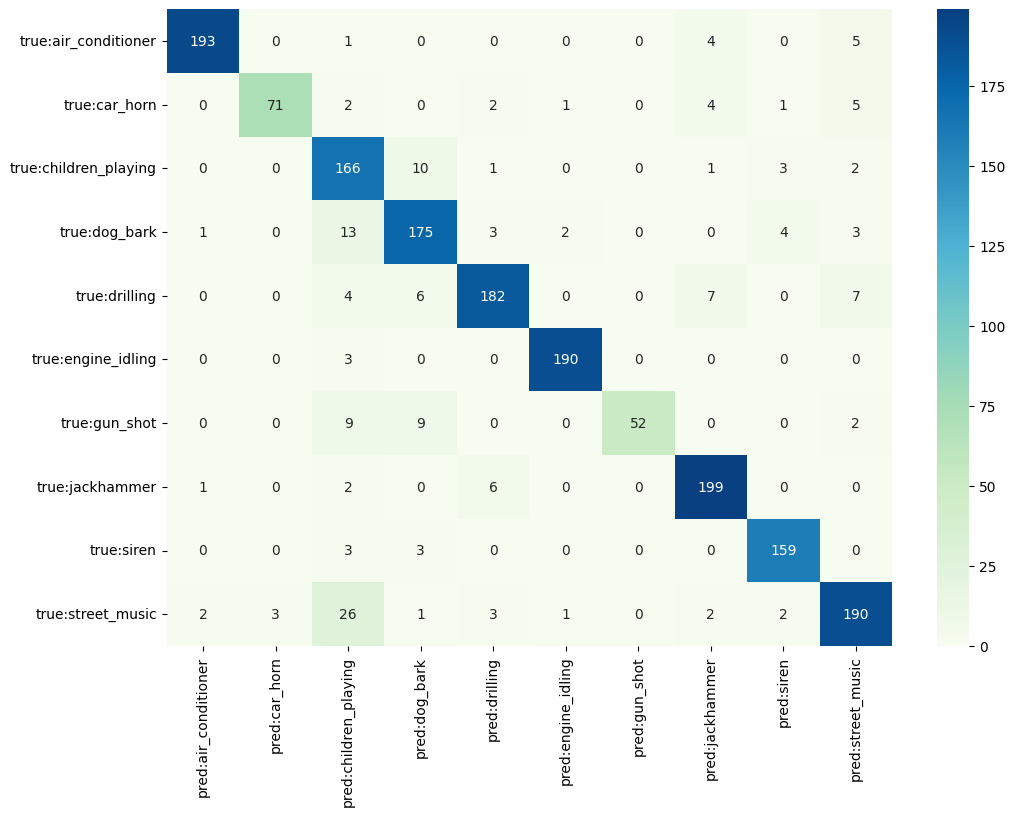

In [34]:
#Confusion Matrix for Random Forest on features - MFCC's
sns.heatmap(forest_cmtx, annot= True, cmap = 'GnBu', fmt='g')

<Axes: >

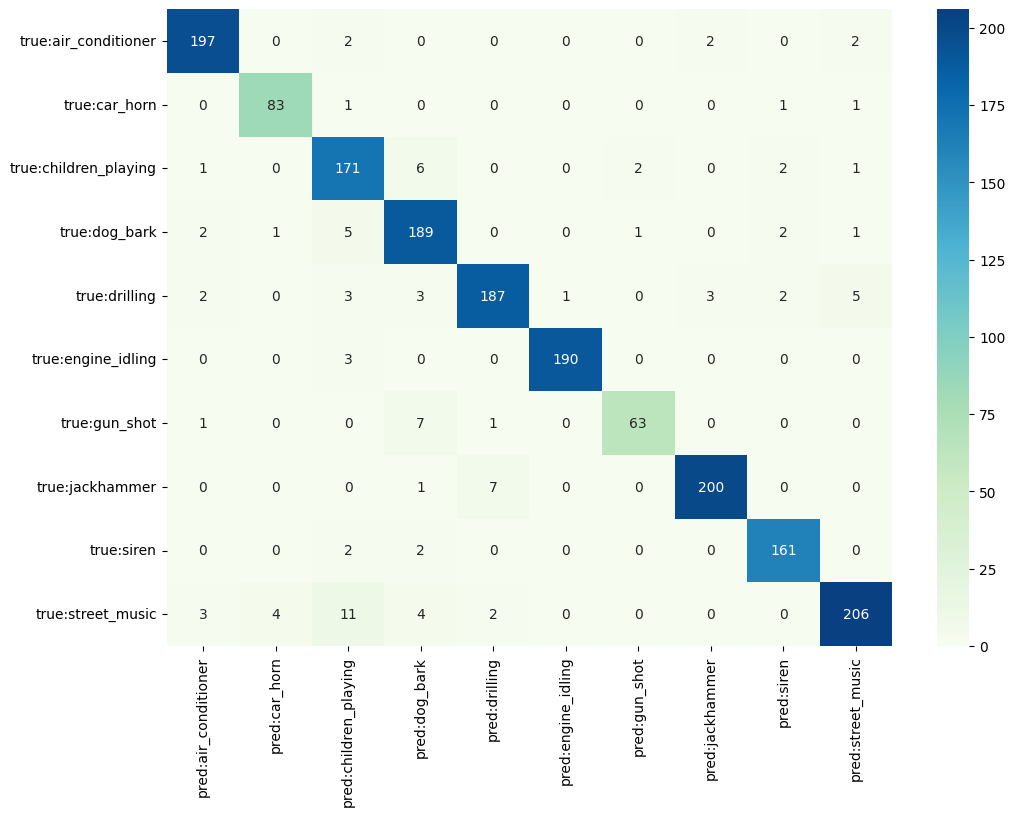

In [35]:
#Confusion Matrix for SVM on features - MFCC's
sns.heatmap(svm_cmtx, annot= True, cmap = 'GnBu', fmt='g')

# Comparative Analysis of Different Models
| Model          | Precision | Recall  | F1 Score | Accuracy |
|----------------|-----------|---------|----------|----------|
| DNN            | 0.91498   | 0.89284 | 0.90154  | 0.90612  |
| Random Forest  | 0.903     | 0.889   | 0.903    | 0.903    |
| SVM            | 0.943     | 0.941   | 0.943    | 0.943    |

# Final Conclusion
Based on the comparative analysis of the three models presented, we can conclude the following:

- Deep Neural Network (DNN) performed well, with a precision of 0.91498, recall of 0.89284, F1 score of 0.90154, and accuracy of 0.90612. This model demonstrates a good balance between precision and recall, indicating that it can identify relevant instances effectively while minimizing false positives.

- The Random Forest model showed slightly lower performance compared to the DNN, with a precision of 0.903, recall of 0.889, F1 score of 0.903, and accuracy of 0.903. Although this model has comparable precision and recall values, its overall performance is lower than that of the DNN.

- Support Vector Machine (SVM) outperformed both the DNN and Random Forest models in all metrics, with a precision of 0.943, recall of 0.941, F1 score of 0.943, and accuracy of 0.943. This model is the best performer among the three, demonstrating high effectiveness in both identifying relevant instances and minimizing false positives.

In conclusion, the SVM model is the best performer among the three models based on the provided metrics. The DNN model comes in second place, with a slightly lower performance compared to the SVM but still showing promising results. The Random Forest model ranks third, with a lower performance than both the DNN and SVM models.

# Take Aways

The three models – Deep Neural Network (DNN), Random Forest, and Support Vector Machine (SVM) – demonstrated success in classifying audio files using Mel Frequency Cepstral Coefficients (MFCC) features. MFCCs effectively represent the short-term power spectrum of the audio signal, capturing vital information about its timbre and spectral characteristics. By using these features as inputs, the models were able to identify and learn the underlying patterns and structures present in the audio data. As a result, the models exhibited varying degrees of success in discerning the different audio classes, with SVM being the most effective. This achievement highlights the importance of selecting appropriate features, such as MFCCs, for audio classification tasks, and demonstrates the potential of machine learning models in processing and analyzing complex audio data.
